<font color = 'green'>Hunter Carroll</font>
---

<font color = 'green'>Programming Homework 4</font>
---

---

Consider the problem of predicting if a letter is C or G. The data are stored in letterCG. There are 17 column: the first column is the target label 'C' or 'G', and the rest of the 16 columns are input features.
1.	lettr	capital letter	(C or G)
2.	x-box	horizontal position of box	(integer)
3.	y-box	vertical position of box	(integer)
4.	width	width of box			(integer)
5.	high 	height of box			(integer)
6.	onpix	total # on pixels		(integer)
7.	x-bar	mean x of on pixels in box	(integer)
8.	y-bar	mean y of on pixels in box	(integer)
9.	x2bar	mean x variance			(integer)
10.	y2bar	mean y variance			(integer)
11.	xybar	mean x y correlation		(integer)
12.	x2ybr	mean of x * x * y		(integer)
13.	xy2br	mean of x * y * y		(integer)
14.	x-ege	mean edge count left to right	(integer)
15.	xegvy	correlation of x-ege with y	(integer)
16.	y-ege	mean edge count bottom to top	(integer)
17.	yegvx	correlation of y-ege with x	(integer)

Split the data into training $70\%$ and validation $30\%$ parts, with a random state of $30$. 
1. Implement the Adaboost algorithm with decision tree with max depth=1 as the base classifier and use learning rate=0.2. Run Adaboost for 200 rounds (M=200). 

2. Use the staged_score() function (check the function description) on the validation data to get the accuracy score to find the optimal $M$. The final Adaboost ensemble uses the optimal $M$. 

3. Report the accuracy of prediction with the final ensemble for the validation instances.

4. Make a plot of the accuracy score vs ensemble size/rounds (M) for the training data. Make the same plot for the validation data on the same figure. What do you find?

(Hint: when you read the data using pandas.read_csv(), you need to set delim_whitespace to True)


---


<font color = 'green'>Load in the Data</font>
---

---

In [3]:
import pandas as pd

file_path = '/Users/huntercarroll/Desktop/DesktopHunter/Spring2024/Machine Learning/ProgrammingHomework/HW4Programming/letterCG.data'
letterCG = pd.read_csv(file_path, delim_whitespace = True )
letterCG.head(5)

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


---

<font color = 'green'>Split the Data for Training and Validation</font>
---

---

In [4]:
from sklearn.model_selection import train_test_split

X = letterCG.drop('Class', axis=1) # input features
y =  letterCG['Class'] # Target Variable 

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=30)
print('=='*50)
print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)
print('=='*50)

(1056, 16) (453, 16) (1056,) (453,)


---
<font color = 'green'>Implement the Adaboost algorithm with decision tree with max depth=1 as the base classifier and use learning rate=0.2. Run Adaboost for 200 rounds (M=200).</font>
---

---

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# default algorithm =’SAMME.R’
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=200,  # 200 rounds
                             learning_rate=0.2) 

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.2, n_estimators=200)

---

<font color = 'green'>Use the staged_score() function (check the function description) on the validation data to get the accuracy score to find the optimal $M$. The final Adaboost ensemble uses the optimal $M$.</font>
---

---

In [6]:
import numpy as np
# Testing out Functionality 
list = [1,2,3,4]
index_max = np.argmax(list)+1 # if we don't add 1 then it gives us the zero-based index for which the max occurs
print(index_max)
list[index_max - 1] # Return back to zero-based index 
# We will employ this below

4


4

In [7]:
# Create a list of accuracy scores for each round of boosting and store theses in 'accuracy_scores'
# We just need to see the accuracy score for each ensemble size the code below should achieve this, 
accuracy_scores = [score for score in ada_clf.staged_score(X_validation, y_validation)] # Getting accuracy scores on the validation data

# Find the index of the best accuracy score: given we have a list
optimal_estimators = np.argmax(accuracy_scores) + 1  
best_accuracy = accuracy_scores[optimal_estimators - 1]

print('=='*60)
print(f'Our optimal estimators is {optimal_estimators} for validation and our best accuracy is {best_accuracy:.4f} or {best_accuracy*100: .2f} % for validation.')
print('=='*60)

# Retrain the model using optimal_estimators and best_accuracy , 

ada_clf_optimal = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=optimal_estimators, 
                             learning_rate=0.2)
    
ada_clf_optimal.fit(X_train, y_train)

Our optimal estimators is 143 for validation and our best accuracy is 0.9514 or  95.14 % for validation.


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.2, n_estimators=143)

---

<font color = 'green'>Report the accuracy of prediction with the final ensemble for the validation instances.</font>
---

---

In [11]:
from sklearn.metrics import accuracy_score

ada_clf.fit(X_train, y_train)

y_pred_validation_score = ada_clf.predict(X_validation)

valaccuracy = accuracy_score(y_validation,y_pred_validation_score )


print('=='*50)
print(f'The accuracy of prediction with the final ensemble for the validation instances is, {valaccuracy: .4f}')
print('=='*50)

The accuracy of prediction with the final ensemble for the validation instances is,  0.9470


---

<font color = 'green'>Make a plot of the accuracy score vs ensemble size/rounds (M) for the training data. Make the same plot for the validation data on the same figure. What do you find?</font>
---

---

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


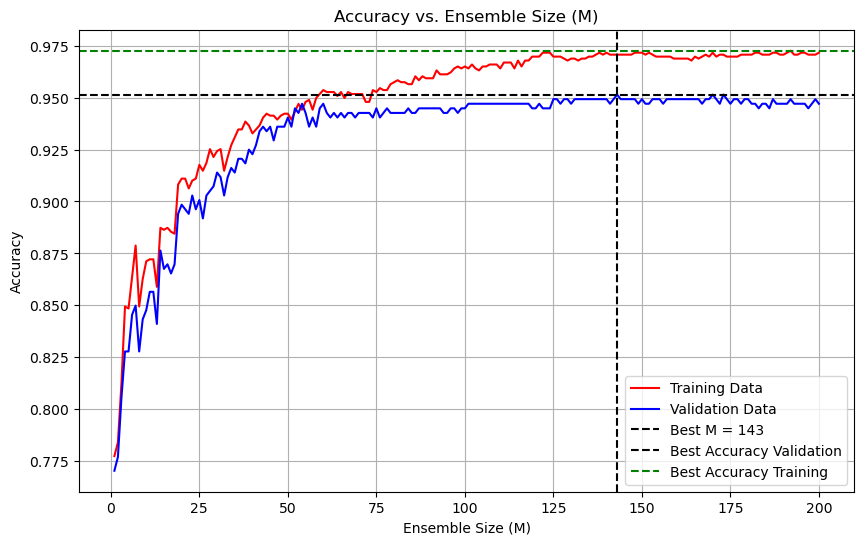

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Generate accuracy scores for each boosting round for our training data
# For validation we have accuracy_scores as defined above
train_accuracy_scores = [score for score in ada_clf.staged_score(X_train, y_train)]


# the rounds considered
ensemble_sizes = np.arange(1, len(train_accuracy_scores) + 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ensemble_sizes, train_accuracy_scores, label='Training Data', color= 'r')
plt.plot(ensemble_sizes, accuracy_scores, label='Validation Data', color = 'b')
plt.axvline(x = optimal_estimators, color = 'black', linestyle= '--',
           label = f'Best M = {optimal_estimators}')
# Best validation accuracy
plt.axhline(y = 0.9514, color = 'black', linestyle= '--',
           label = 'Best Accuracy Validation')

# Best training accuracy 
plt.axhline(y = 0.9725, color = 'green', linestyle= '--',
           label = 'Best Accuracy Training')
plt.title('Accuracy vs. Ensemble Size (M)')
plt.xlabel('Ensemble Size (M)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

---

<font color = 'green'>Interpretation of The Plot Above:</font>
---

As the number of trees increases, the accuracy also increases, however, at a certain size $M = 143$ we find the accuracy to begin to plateau reaching an optimal accuracy of $0.9514$. The model performs better on the training data, as expected since the model has already run through the training data and learned to make predictions with our training data so it is indeed plausible for it to achieve higher accuracies. The gap between our training accuracy and validation accuracy is small indicating that our model **does not appear to be significantly overfitting** but there comes a point ($M=143$) in ensemble size where our model can no longer perform any better with increasing model complexity, this is the point after which increasing the ensemble size does not yield a significant or any improvement in validation accuracy. 


---